In [1]:
codedir = "/Users/admin/UDel/FASTLab/Summer2021_Research/SESNspectraPCA/code"
imagedir = "/Users/admin/UDel/FASTLab/Summer2021_Research/imagedir"
datadir = ("/Users/admin/Udel/FASTLab/Summer2021_Research/"
           "SESNspectraPCA/Data/DataProducts")

import sys  
sys.path.insert(0, codedir)

import os
import glob

# import sklearn
# from sklearn.svm import LinearSVC
# from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
# import astropy.units as u
# import astropy.constants as c
# from scipy.integrate import trapezoid
# from astropy.convolution import convolve_fft, convolve, Gaussian1DKernel

import SNIDsn
import SNIDdataset as snid
# import SNePCA

# import degrade
# import kernels
# import plotutils
# import utils
# import classify_PCASVC as cps

import astrodash as ad

# from collections import OrderedDict

from importlib import reload

Instructions for updating:
non-resource variables are not supported in the long term


# Get unique list of SN from SNID and DASH datasets.

In [31]:
dataset0 = snid.loadPickle('../Data/DataProducts/dataset0.pickle')
dataset5 = snid.loadPickle('../Data/DataProducts/dataset5.pickle')
dataset10 = snid.loadPickle('../Data/DataProducts/dataset10.pickle')
dataset15 = snid.loadPickle('../Data/DataProducts/dataset15.pickle')

SNID_SNlist = []
SNID_SNlist.extend(snid.getDiagnostics(dataset0)[0])
SNID_SNlist.extend(snid.getDiagnostics(dataset5)[0])
SNID_SNlist.extend(snid.getDiagnostics(dataset10)[0])
SNID_SNlist.extend(snid.getDiagnostics(dataset15)[0])

dash_files = glob.glob("/Users/admin/UDel/FASTLab/"
                       "astrodash/templates/training_set/*lnw")
DASH_SNlist = []
for file in dash_files:
    snidsn = SNIDsn.SNIDsn()
    snidsn.loadSNIDlnw(file)
    DASH_SNlist.append(snidsn.header["SN"])
    
SNlist = np.unique(np.append(SNID_SNlist, DASH_SNlist))

# Check which SN phases are present in SNID but not in DASH

In [35]:
nNewSN = 0
nNewSp = 0

for sn in SNlist:
    SNID_phases = []
    try:
        SNID_phases.extend(dataset0[sn].phases)
    except Exception:
        pass
    
    try:
        SNID_phases.extend(dataset5[sn].phases)
    except Exception:
        pass
    
    try:
        SNID_phases.extend(dataset10[sn].phases)
    except Exception:
        pass
    
    try:
        SNID_phases.extend(dataset15[sn].phases)
    except Exception:
        pass
    
    if sn in DASH_SNlist:
        snidsn = SNIDsn.SNIDsn()
        try:
            DASH_lnw = ("/Users/admin/UDel/FASTLab/"
                    f"astrodash/templates/training_set/{sn}.lnw")
            snidsn.loadSNIDlnw(DASH_lnw)
        except FileNotFoundError:
            DASH_lnw = ("/Users/admin/UDel/FASTLab/"
                    f"astrodash/templates/training_set/{sn}_bsnip.lnw")
            snidsn.loadSNIDlnw(DASH_lnw)
        DASH_phases = snidsn.phases
        
        for phase in SNID_phases:
            if phase not in DASH_phases:
                print(f"NEW SPECTRA: {sn:<8} {phase}")
                nNewSp += 1
        
    else:
        print(f"NEW SN: {sn:<8}")
        nNewSN += 1
print(nNewSp)
print(nNewSN)

NEW SN: 10as    
NEW SN: 11hs    
NEW SN: 13ge    
NEW SN: 15dtg   
NEW SN: 16coi   
NEW SN: 16gkg   
NEW SN: 17ein   
NEW SN: LSQ14efd
NEW SPECTRA: sn1996cb -0.9
NEW SPECTRA: sn1996cb 5.1
NEW SPECTRA: sn1996cb 6.1
NEW SN: sn1999dn
NEW SPECTRA: sn2003jd 0.2
NEW SPECTRA: sn2003jd 1.2
NEW SPECTRA: sn2003jd 18.8
NEW SPECTRA: sn2004gt 16.4
NEW SPECTRA: sn2004gv 13.0
NEW SPECTRA: sn2004gv 15.0
NEW SPECTRA: sn2005hg -0.9
NEW SPECTRA: sn2005hg 11.8
NEW SPECTRA: sn2005hg 15.8
NEW SPECTRA: sn2005mf -1.1
NEW SPECTRA: sn2005mf 4.8
NEW SPECTRA: sn2005mf 7.7
NEW SPECTRA: sn2006aj 9.6
NEW SPECTRA: sn2006aj 10.6
NEW SPECTRA: sn2006el -4.1
NEW SPECTRA: sn2006el 9.6
NEW SPECTRA: sn2006el 9.6
NEW SPECTRA: sn2006el 15.5
NEW SPECTRA: sn2006ep 7.7
NEW SPECTRA: sn2006ep 9.7
NEW SPECTRA: sn2006ep 11.6
NEW SPECTRA: sn2007gr 0.0
NEW SPECTRA: sn2007gr 5.0
NEW SPECTRA: sn2007kj -1.0
NEW SPECTRA: sn2007kj 3.9
NEW SPECTRA: sn2007uy -3.3
NEW SPECTRA: sn2007uy 12.6
NEW SPECTRA: sn2007uy 12.6
NEW SPECTRA: sn2008D  2.

# Check if the new SNID spectra in the shared SN are duplicates.

It is unclear if these are duplicates or not. The raw data sometimes looks similar but not the same. SNID data is preprocessed, this could be why? But why would the phases be slightly different? How could there be discrepencies in the recording of the phases if they are the same data?

In [115]:
sn = "sn2003jd"

try:
    DASH_lnw = ("/Users/admin/UDel/FASTLab/"
            f"astrodash/templates/training_set/{sn}.lnw")
    snidsn.loadSNIDlnw(DASH_lnw)
except FileNotFoundError:
    print("yeehaw")
    DASH_lnw = ("/Users/admin/UDel/FASTLab/"
            f"astrodash/templates/training_set/{sn}_bsnip.lnw")
    snidsn.loadSNIDlnw(DASH_lnw)
DASH_phases = snidsn.phases


SNID_phases = []
try:
    SNID_phases.extend(dataset0[sn].phases)
except Exception:
    pass

try:
    SNID_phases.extend(dataset5[sn].phases)
except Exception:
    pass

try:
    SNID_phases.extend(dataset10[sn].phases)
except Exception:
    pass

try:
    SNID_phases.extend(dataset15[sn].phases)
except Exception:
    pass

In [116]:
DASH_phases

array([-3.600e+00, -2.600e+00, -1.600e+00, -6.000e-01,  4.000e-01,
        1.840e+01,  1.940e+01,  2.040e+01,  2.140e+01,  2.240e+01,
        2.340e+01,  2.640e+01,  2.740e+01,  3.340e+01,  4.640e+01,
        4.740e+01,  4.840e+01,  4.940e+01,  4.940e+01,  5.140e+01,
        5.440e+01,  5.540e+01,  6.040e+01,  7.340e+01,  4.044e+02])

In [117]:
SNID_phases

[0.2, 1.2, 18.8]

In [118]:
DASH_flux = snidsn.data[f"Ph6.5"]
DASH_wvls = snidsn.wavelengths

SNID_flux = dataset10[sn].data[f"Ph{SNID_phases[2]}"]
SNID_wvls = dataset10[sn].wavelengths

plt.figure(figsize=(20, 10))
plt.plot(DASH_wvls, DASH_flux, marker="o", label="DASH")
plt.plot(SNID_wvls, SNID_flux, marker="o", label="SNID")
plt.xlim((4000, 7000))
plt.legend()
plt.show()

ValueError: no field of name Ph6.5

# Try to combine new spectra and SN into DASH data

In [90]:
snidsn.getSNCols()

('Ph-3.6',
 'Ph-2.6',
 'Ph-1.6',
 'Ph-0.6',
 'Ph0.4',
 'Ph18.4',
 'Ph19.4',
 'Ph20.4',
 'Ph21.4',
 'Ph22.4',
 'Ph23.4',
 'Ph26.4',
 'Ph27.4',
 'Ph33.4',
 'Ph46.4',
 'Ph47.4',
 'Ph48.4',
 'Ph49.4',
 'Ph49.4v1',
 'Ph51.4',
 'Ph54.4',
 'Ph55.4',
 'Ph60.4',
 'Ph73.4',
 'Ph404.4')

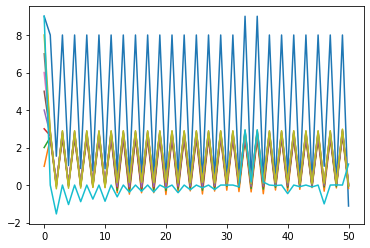

In [95]:
plt.plot(dataset0[sn].continuum.T)